# 13. INTRODUCTION DEEP LEARNING

# 13.6. Binary Classification

# 13.6.1. COURS 

In [4]:
# Chemin des sources
import os
os.chdir('C:/Users/PC Maison/4-KAGGLE/KAGGLE_DEV/KAGGLE_COURS_13-INTRO_DEEP_LEARNING/input')

In [5]:
import pandas as pd
from IPython.display import display

ion = pd.read_csv('ion.csv', index_col=0)
display(ion.head())

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


In [6]:
df = ion.copy()
df['Class'] = df['Class'].map({'good': 0, 'bad': 1})

In [7]:
df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

In [8]:
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

In [9]:
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)
df_train.dropna(axis=1, inplace=True) # drop the empty feature in column 2
df_valid.dropna(axis=1, inplace=True)

In [10]:
X_train = df_train.drop('Class', axis=1)
X_valid = df_valid.drop('Class', axis=1)
y_train = df_train['Class']
y_valid = df_valid['Class']

In [11]:
X_train

,V1,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34
7,1.0,0.987940,0.44699,0.973005,0.396000,0.964030,0.358250,0.929980,0.363290,0.898830,...,0.613960,0.091830,0.568295,0.087450,0.523030,0.088025,0.478690,0.09341,0.430840,0.095125
53,1.0,1.000000,1.00000,1.000000,1.000000,0.955050,1.000000,0.365150,1.000000,0.084240,...,0.950070,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.32657,1.000000,0.674225
115,1.0,0.956765,0.90793,0.135135,1.000000,0.302670,0.778675,0.527025,0.648650,0.407005,...,0.499985,0.500010,0.499995,0.500000,0.500000,0.500000,0.500000,0.50000,0.500000,0.500000
46,0.0,0.500000,0.50000,0.500000,0.500000,0.500000,0.500000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.50000,0.500000,0.500000
107,1.0,0.500000,0.50000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.810975,...,0.500000,0.500000,1.000000,0.554880,0.500000,0.500000,0.500000,0.50000,0.500000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1.0,1.000000,0.52906,0.972625,0.537090,0.999760,0.566155,1.000000,0.490445,0.974230,...,0.958335,0.612155,0.942115,0.617855,0.942840,0.612555,0.891620,0.64788,0.917870,0.655830
42,1.0,0.000000,0.00000,1.000000,1.000000,1.000000,0.428125,0.500000,0.500000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.500000,0.500000
15,1.0,1.000000,0.53690,1.000000,0.517100,1.000000,0.472185,1.000000,0.543820,1.000000,...,1.000000,0.600165,1.000000,0.683715,0.978015,0.743205,1.000000,0.66246,1.000000,0.733560
156,1.0,0.862070,0.49458,0.898520,0.505420,0.900000,0.500985,0.895075,0.505420,0.892120,...,0.863055,0.492610,0.890205,0.503060,0.870445,0.474875,0.914780,0.51478,0.895075,0.503940


In [12]:
y_train

7      0.0
53     0.0
115    1.0
46     1.0
107    1.0
      ... 
59     0.0
42     1.0
15     0.0
156    0.0
51     0.0
Name: Class, Length: 246, dtype: float64

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[33]),
    layers.Dense(4, activation='relu'),    
    layers.Dense(1, activation='sigmoid'),
])

In [14]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [16]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)

Best Validation Loss: 0.4344
Best Validation Accuracy: 0.8667


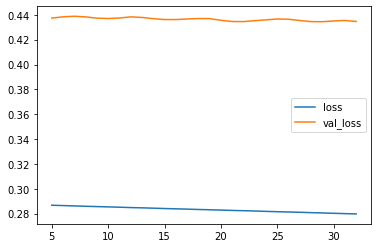

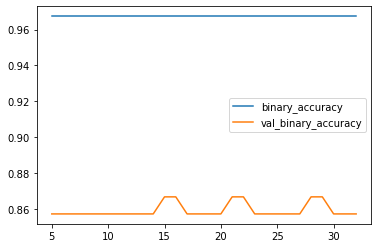

In [17]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

# 13.6.2. EXERCICES

In [18]:
# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

hotel = pd.read_csv('hotel.csv')

In [20]:
X = hotel.copy()
y = X.pop('is_canceled')

In [21]:
X['arrival_date_month'] = \
    X['arrival_date_month'].map(
        {'January':1, 'February': 2, 'March':3,
         'April':4, 'May':5, 'June':6, 'July':7,
         'August':8, 'September':9, 'October':10,
         'November':11, 'December':12}
    )

In [22]:
features_num = [
    "lead_time", "arrival_date_week_number",
    "arrival_date_day_of_month", "stays_in_weekend_nights",
    "stays_in_week_nights", "adults", "children", "babies",
    "is_repeated_guest", "previous_cancellations",
    "previous_bookings_not_canceled", "required_car_parking_spaces",
    "total_of_special_requests", "adr",
]
features_cat = [
    "hotel", "arrival_date_month", "meal",
    "market_segment", "distribution_channel",
    "reserved_room_type", "deposit_type", "customer_type",
]

In [23]:
transformer_num = make_pipeline(
    SimpleImputer(strategy="constant"), # there are a few missing values
    StandardScaler(),
)

In [24]:
transformer_cat = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown='ignore'),
)

In [25]:
preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)

In [26]:
# stratify - make sure classes are evenlly represented across splits
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

In [27]:
input_shape = [X_train.shape[1]]

# 1) Define Model

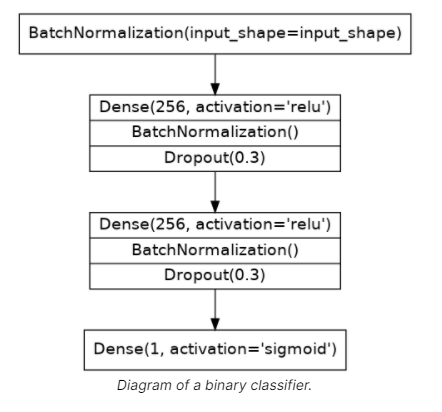

In [34]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3),
    layers.Dense(256, activation='relu'),  
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3),
    layers.Dense(1, activation='sigmoid'),
])

# 2) Add Optimizer, Loss, and Metric

In [35]:
# compilez le modèle avec l'optimiseur Adam et les versions binaires de la 
# mesure de la perte d'entropie croisée et de la précision.
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [36]:
# entraîner le modèle et visualiser les courbes d'apprentissage
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

Epoch 1/200
175/175 [==============================] - 1s 5ms/step - loss: 0.4885 - binary_accuracy: 0.7687 - val_loss: 0.4398 - val_binary_accuracy: 0.7807
Epoch 2/200
175/175 [==============================] - 1s 5ms/step - loss: 0.4241 - binary_accuracy: 0.7996 - val_loss: 0.4015 - val_binary_accuracy: 0.8124
Epoch 3/200
175/175 [==============================] - 1s 5ms/step - loss: 0.4090 - binary_accuracy: 0.8081 - val_loss: 0.3944 - val_binary_accuracy: 0.8176
Epoch 4/200
175/175 [==============================] - 1s 5ms/step - loss: 0.4020 - binary_accuracy: 0.8121 - val_loss: 0.3907 - val_binary_accuracy: 0.8201
Epoch 5/200
175/175 [==============================] - 1s 4ms/step - loss: 0.3968 - binary_accuracy: 0.8142 - val_loss: 0.3854 - val_binary_accuracy: 0.8230
Epoch 6/200
175/175 [==============================] - 1s 4ms/step - loss: 0.3916 - binary_accuracy: 0.8174 - val_loss: 0.3829 - val_binary_accuracy: 0.8245
Epoch 7/200
175/175 [==============================] - 1s 

<AxesSubplot:title={'center':'Accuracy'}>

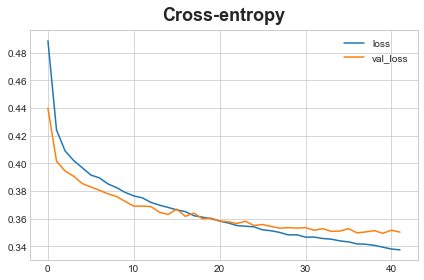

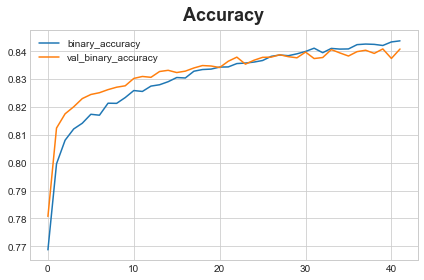

In [37]:
history = model.fit(X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

# 3) Train and Evaluate